In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [4]:
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

In [5]:
def binomial_distribution(N, p, k):
    """
    Yields probability of k successful cases in N total trials
    for a p probability of success.
    """
    N = np.floor(N)
    # We shift k so that the steps of the function are centered at floor(k).
    k = np.floor(k + 0.5)
    return comb(N, k) * p ** k * (1 - p) ** (N - k)

In [34]:
def hist_to_pmf(ax, X, **kwargs):
    occurrences, limits, rectangles = ax.hist(X, **kwargs)
    
    total_occurrences = sum(occurrences)
    for n, r in zip(occurrences, rectangles):
        r.set_height(n / total_occurrences)
    new_rectangle_heights = [r.get_height() for r in rectangles]
    ax.set_ylim(0, 1.15 * np.max(new_rectangle_heights))

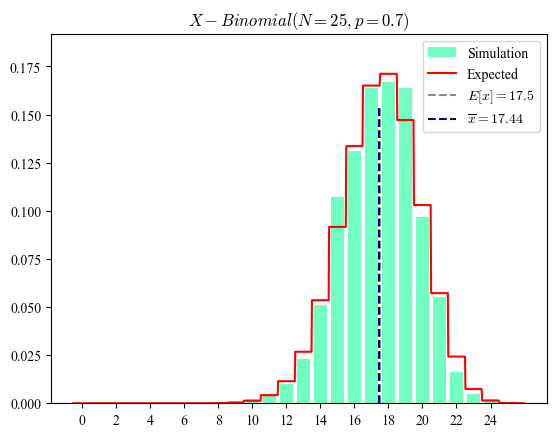

In [7]:
n = 1000
N = 25
p = 0.7
# We shift the bins to center them at integer values.
bins = [x - 0.5 for x in range(N + 2)]
X = np.random.binomial(N, p, n)

fig, ax = plt.subplots()
hist_to_pmf(ax, X, bins = bins, color = "#72ffc2", rwidth = 0.75, label = "Simulation")

x = np.linspace(-0.5, N + 1, 1000)
ax.plot(x, binomial_distribution(N, p, x), "r-", label = "Expected")
ax.set_xticks(range(0, N + 1, 2))
ax.set_title(f"$X - Binomial({N = }, {p = })$")

# Expected value
ax.axvline(N * p, 0, 0.8, color = "#888", linestyle = "--", label = f"$E[x] = {round(N * p, 2)}$")
ax.axvline(X.mean(), 0, 0.8, color = "#008", linestyle = "--", label = f"$\overline{{x}} = {round(X.mean(), 2)}$")
# ax.text(N * p, 0.02, f"$\overline{{x}} = {round(X.mean(), 2)}$", ha = "center", size = 15)
# ax.text(N * p, 0.01, f"$E[x] = {round(N * p, 2)}$", ha = "center", size = 15)
ax.legend()

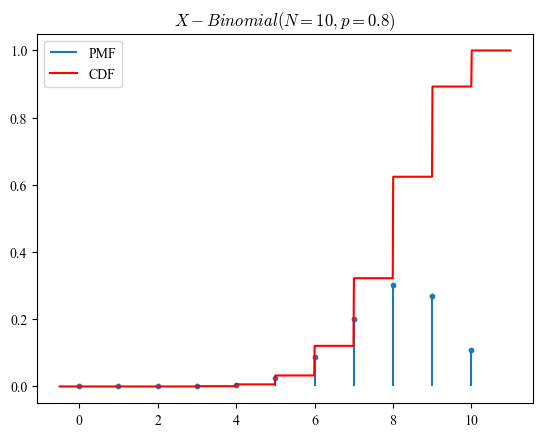

In [8]:
# Using scipy
from scipy import stats
N = 10
p = 0.8

ks = [k for k in range(N + 1)]
pVal = [stats.binom.pmf(k, N, p) for k in range(N + 1)]

fig, ax = plt.subplots()
x = np.linspace(-0.5, N + 1, 1000)
ax.scatter(ks, pVal, s = 10)
ax.vlines(ks, 0, pVal, label = "PMF")
ax.plot(x, stats.binom.cdf(x, N, p), label = "CDF", color = "r")

ax.set_xticks(range(0, N + 1, 2))
ax.set_title(f"$X - Binomial({N = }, {p = })$")
ax.legend()

[Text(0.5, 0, 'p'), Text(0, 0.5, 'PMF')]

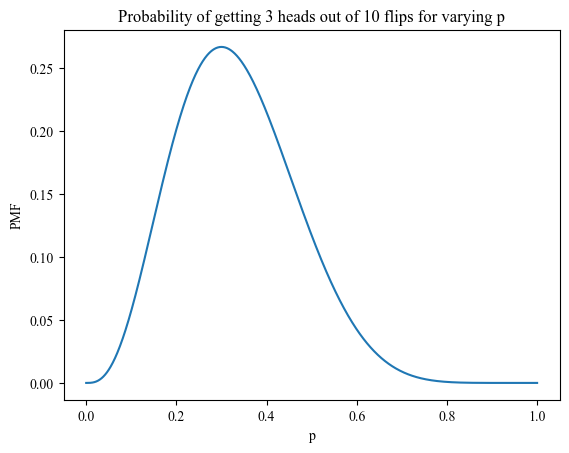

In [9]:
# Probability of getting 3 heads out of 10 flips for varying p
N = 10
k = 3

fig, ax = plt.subplots()
x = np.linspace(0, 1, 1000)
ax.plot(x, stats.binom.pmf(k, N, x))
ax.set_title("Probability of getting 3 heads out of 10 flips for varying p")
ax.set(xlabel = "p", ylabel = "PMF")

In [10]:
def poisson_graph(x, lamb):
    # We shift x to line up with integers.
    x = np.floor(x + 0.5)
    return stats.poisson.pmf(x, lamb)

Text(0.5, 1.0, '$X - Poisson(30)$')

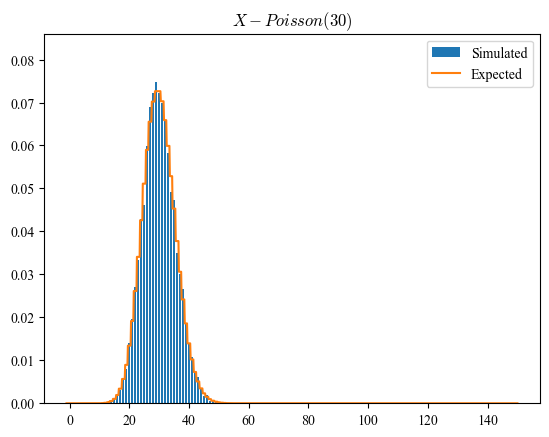

In [11]:
# Poisson
n = 10000
lamb = 30
X = np.random.poisson(lamb, n)

fig, ax = plt.subplots()
bins = [x - 0.5 for x in range(5 * lamb)]
hist_to_pmf(ax, X, bins = bins, rwidth = 0.75, label = "Simulated")

x = np.linspace(-1, 5 * lamb, 1000)
ax.plot(x, poisson_graph(x, lamb), label = "Expected")

ax.legend()
ax.set_title(f"$X - Poisson({lamb})$")

V[Y] = 14.285714285714285
V[X] = 12.244897959183673


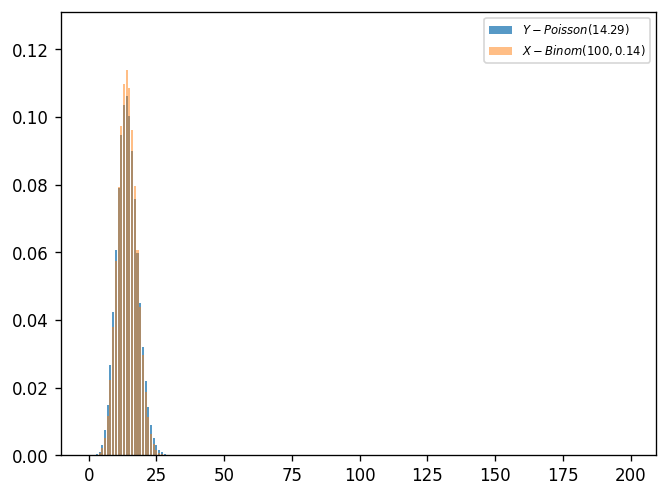

In [42]:
# Poisson vs binomial
p = 1 / 7
N = 100
n = 1000000
nbins = [x - 0.5 for x in range(2 * N + 1)]
X = np.random.binomial(N, p, n)
Y = np.random.poisson(N * p, n)

fig, ax = plt.subplots(1, dpi = 120)
hist_to_pmf(ax, Y, bins = nbins, rwidth = 0.75, alpha = 0.75, label = f"$Y - Poisson({round(N * p, 2)})$")
hist_to_pmf(ax, X, bins = nbins, rwidth = 0.75, alpha = 0.5, label = f"$X - Binom({N}, {round(p, 2)})$")
ax.legend(fontsize = 7)

print(f"V[Y] = {N * p}")
print(f"V[X] = {N * p * (1 - p)}")

0.0002


NameError: name 'poisson_graph' is not defined

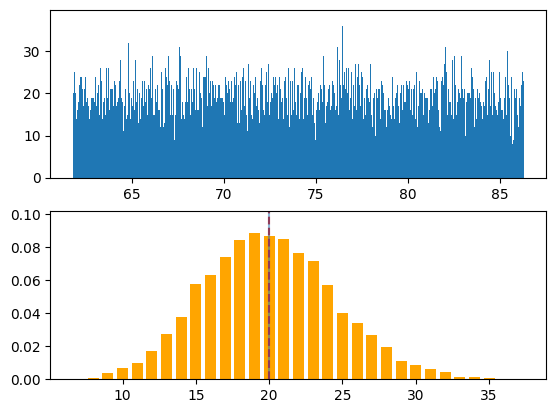

In [35]:
# Uniform distribuition heights
a, b = np.random.uniform(0, 100, 2)
n = 100000
nbins = 5000
X = np.random.uniform(a, b, n)
# The expected value of occurrences per bin is lamb = n / nbins.
# The probability of falling in a bin is given by p = 1 / nbins
lamb = n / nbins
p = 1 / nbins
print(p)

fig, axs = plt.subplots(2)
occurrences, rectangles, bars = axs[0].hist(X, bins = nbins)

Y = occurrences
ybins = [x - 0.5 for x in range(int(min(Y)), int(max(Y)) + 1)]
hist_to_pmf(axs[1], Y, bins = ybins, rwidth = 0.75, color = "orange")
axs[1].axvline(lamb, label = f"Expected value: {lamb}", linestyle = "--", color = "r")
axs[1].axvline(Y.mean(), label = f"Average: {Y.mean()}", alpha = 0.5)


# The height of any given bin in the uniform distribution follows a binomial distribution with
# probability p. As p -> 0 we may approximate this distribuition with a poission distribution of
# expected value lamb.
y = np.linspace(min(Y) - 1, int(max(Y)) + 1, 1000)
axs[1].plot(y, poisson_graph(y, lamb), color = "r")
axs[1].legend()

# We could've modelled the distribuition as a binomial, but as the number of samples from the uniform
# distribution increase, the computational cost also increases.
axs[1].plot(y, binomial_distribution(n, p, y), color = "k")

Highest probability of falling within bin: 0.0247632841972667


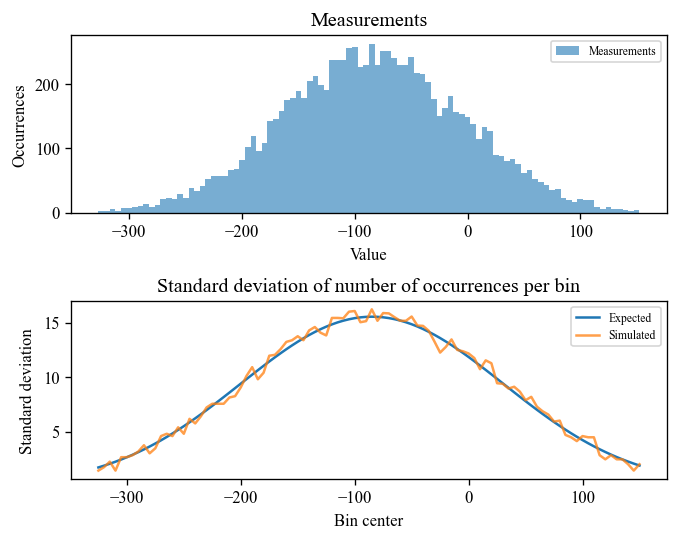

In [134]:
# Histogram heights for a normal distribution
N = 10000
mu = np.random.uniform(-100, 100)
sigma = np.random.uniform(0, 100)
bin_resolution = 5
bins = [x - 0.5 for x in range(int(np.floor(mu - 3 * sigma)), int(np.floor(mu + 3 * sigma)), bin_resolution)]

# Plots
X = np.random.normal(mu, sigma, N)
fig, axs = plt.subplot_mosaic([["X"], ["stdv"]], dpi = 120)
occurrences, rectangles, bars = axs["X"].hist(X, bins = bins, label = "Measurements", alpha = 0.6)

# Probability of falling in bin
p_bins = np.array([stats.norm.cdf(max, mu, sigma) - stats.norm.cdf(min, mu, sigma) for min, max in zip(bins[:-1], bins[1:])])
e_bins = p_bins * N # Expected number of measurements on bin
v_bins = N * p_bins * (1 - p_bins) # Expected variance following binomial

# Supposing the occurrence per bin ~ expected value, and p ~ 0 for poisson
# we have the following standard deviations
stdv_bins = np.sqrt(occurrences)
stdv_bins_avg = np.sqrt(occurrences_avg)

bin_centers = [(min + max) / 2 for min, max in zip(bins[:-1], bins[1:])]
# axs["X"].errorbar(bin_centers, e_bins, yerr = np.sqrt(v_bins), capsize = 3, label = "Expected")
# axs["X"].errorbar(bin_centers, occurrences, yerr = stdv_bins, capsize = 3, label = "Simulated", alpha = 0.75)

# Standard deviations
axs["stdv"].plot(bin_centers, np.sqrt(v_bins), label = "Expected")
axs["stdv"].plot(bin_centers, stdv_bins, label = "Simulated", alpha = 0.75)

# Format
axs["X"].set(title = "Measurements", xlabel = "Value", ylabel = "Occurrences")
axs["stdv"].set(title = "Standard deviation of number of occurrences per bin", xlabel = "Bin center", ylabel = "Standard deviation")

for label in ["X", "stdv"]:
    axs[label].legend(fontsize = 7)
print(f"Highest probability of falling within bin: {max(p_bins)}")
plt.subplots_adjust(hspace = 0.5)

In [32]:
# Poisson error for 100 bins, for experiment run 100, 1000, 10000
N = np.array([10, 100, 1000, 10000])
bins = 100
expected_poisson_errors = np.sqrt(N / bins)
simulated_poisson_errors = []

toys = 1000
for n in N:
    poisson_error_avg = 0
    for k in range(toys):
        X = np.random.uniform(0, 1, n)
        occurrences, edges = np.histogram(X, bins)
        poisson_error_avg += sum(np.sqrt(occurrences)) / bins
    simulated_poisson_errors.append(poisson_error_avg / k)

print(expected_poisson_errors)
print(simulated_poisson_errors)

[ 0.31622777  1.          3.16227766 10.        ]
[0.09763941447347431, 0.7764580744650156, 3.124389198745459, 9.997556587881386]
